Importing useful librairies

In [1]:
import pandas as pd
import numpy as np
import collections

from operator import truediv
import os

from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt  
% matplotlib inline
import random

from datetime import datetime
from wordcloud import WordCloud
import pycountry
import seaborn as sns



#### Reading the files containing all events

In [2]:
artist= pd.read_csv('total_events_preprocessed.csv')
artist.count()

/Users/Charlotte/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Adress        35154
Artist       204815
City         202077
Date         204815
Latitude     132312
Longitude    132312
Venue        204814
genre        127392
origin        62381
dtype: int64

# Word cloud

## Artists' country of origin

Taking only the rows where origin is defined

In [3]:
origin=artist.dropna(subset = ['origin'])
origin.count()
origin=origin['origin']

USA and UK are sometimes referred by a different name in our dataset

In [4]:
origin=origin.apply(lambda x: x.lower())
origin=origin.apply(lambda x: x.replace('kingdom of',''))
origin=origin.apply(lambda x: x.replace(' ',''))

origin[origin == 'unitedstatesofamerica'] = 'usa'
origin[origin == 'unitedstates'] = 'usa'
origin[origin == 'u.s.'] = 'usa'
origin[origin=='england'] = 'UK'
origin[origin=='unitedkingdom'] = 'UK'


origin=origin.apply(lambda x: x.title())




Creating concatenated text with all the countries in the dataframe 

In [5]:
def createTextFromTokens(text_list):
    text = " ".join(str(x) for x in text_list)
    text = text.replace("\n", " ") 
    return text

In [6]:
all_origin = createTextFromTokens( origin)


Creating the world cloud

In [7]:
wc = WordCloud(max_words=1000, mask=None, stopwords=None, margin=10, width = 800, height = 400,
               random_state=1).generate(all_origin)

Plotting the world cloud

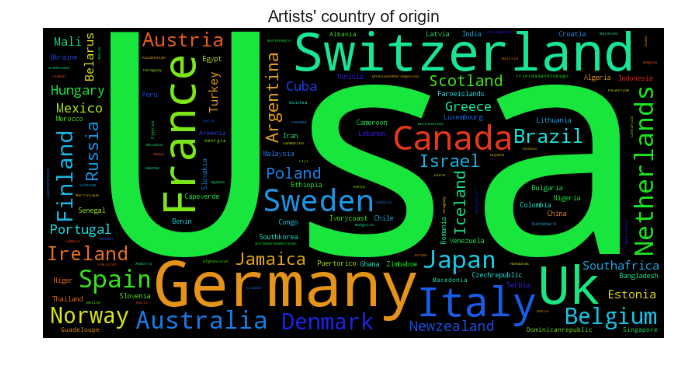

In [8]:
def display_cloud(wc) :
    default_colors = wc.to_array()
    plt.figure()
    plt.title("Artists' country of origin")
    plt.imshow(default_colors)
    plt.axis("off")
    plt.show()
    return

display_cloud(wc)

## Artist's genre

Dropping rows where genre is not defined

In [9]:
genre=artist.dropna(subset = ['genre'])
genre=genre['genre']

Put capitals at beginning of each string of genre and changing hip hop to HipHop so it is considered by the world cloud as one word

In [10]:
genre=genre.apply(lambda x: x.lower())
genre=genre.apply(lambda x: x.replace('/',' '))
genre=genre.apply(lambda x: x.replace(',',' '))
genre=genre.apply(lambda x: x.replace('hip hop','HipHop'))
genre=genre.apply(lambda x: x.title())



Creating concatenated text with all the genre in the dataframe 

In [11]:
all_genre = createTextFromTokens(genre)

Creating world cloud

In [12]:
wc = WordCloud(max_words=1000, mask=None, stopwords=None, margin=10, width = 800, height = 400,
               random_state=1).generate(all_genre)

Plotting world cloud

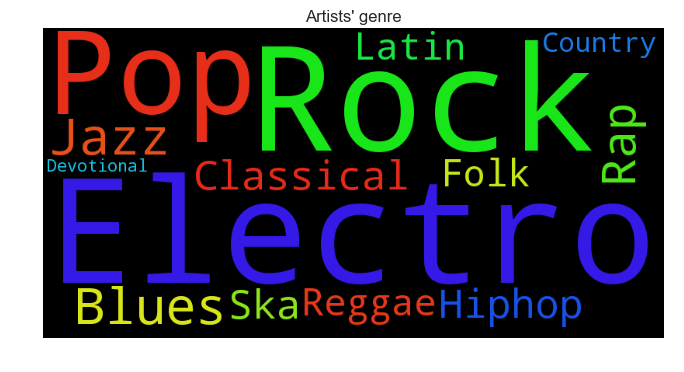

In [13]:
def display_cloud(wc) :
    default_colors = wc.to_array()
    plt.figure()
    plt.title("Artists' genre")
    plt.imshow(default_colors)
    plt.axis("off")
    plt.show()
    return

display_cloud(wc)

# View genre evolution 

Reading total events file

In [14]:
total_events = pd.read_csv(os.path.join('total_events_preprocessed.csv'))
total_events.head()


/Users/Charlotte/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Adress,Artist,City,Date,Latitude,Longitude,Venue,genre,origin
0,NaN,DJs Patric Pleasure,Basel,2017-01-20,NaN,NaN,Balz,Rap/Hip Hop,NaN
1,NaN,Ramon Ramones,Basel,2017-01-20,NaN,NaN,Balz,Rap/Hip Hop,NaN
2,NaN,Bülent Ceylan,Zürich,2017-01-19,NaN,NaN,Vior Club,Reggae/Ska,Germany
3,NaN,Raffi Lusso,Zürich,2017-01-19,NaN,NaN,Vior Club,Reggae/Ska,NaN
4,NaN,Miguel M,Zürich,2017-01-19,NaN,NaN,Vior Club,Reggae/Ska,NaN


Dropping columns where genre is not defined

In [15]:
events=total_events.dropna(subset = ['genre'])

Get year from date and add it to the dataframe

In [16]:
events['year']=events['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)


/Users/Charlotte/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Removing rows from dataframe where year is before 2006 as there are too few to be representative

In [17]:
events= events[['year','genre']]
events=events.loc[events['year'] >2005]


Getting the list of all the genres that appear in the dataframe

In [18]:
genre=events['genre']
list_of_genre=genre.value_counts()
list_of_genre

Electro        38111
Rock           32262
Pop            15765
Jazz/Blues     15148
Rap/Hip Hop    13742
Classical       3963
Reggae/Ska      3122
Folk            2719
Latin            682
Country          659
Other            655
Devotional       553
Name: genre, dtype: int64

Function that counts the number of times a genre appears in the dataframe for each year

In [19]:
def get_frequencies(name):
    counted=events[genre == name].groupby('year').count()
    dict_=counted.to_dict()['genre']
    dict_=collections.OrderedDict(sorted(dict_.items(), key=lambda t: t[0]))
    numbers=list(dict_.values())
    return (numbers)
    

Use the function defined above for electro, rock, pop, Jazz/blues, Rap/Hip Hop, Classical, Folk, Latin, Country and Devotional

In [20]:
electro_numbers=get_frequencies('Electro')
rock_numbers=get_frequencies('Rock')
pop_numbers=get_frequencies('Pop')
jazz_numbers=get_frequencies('Jazz/Blues')
rap_numbers=get_frequencies('Rap/Hip Hop')
classical_numbers=get_frequencies('Classical')
reggae_numbers=get_frequencies('Reggae/Ska')
folk_numbers=get_frequencies('Folk')
latin_numbers=get_frequencies('Latin')
country_numbers=get_frequencies('Country')
devotional_numbers=get_frequencies('Devotional')


total= [y0 + y1+y2+y3+y4+y5+y6+y7+y8+y9+y10 for y0, y1,y2,y3,y4,y5,y6,y7,y8,y9,y10 in zip(electro_numbers, rock_numbers,pop_numbers,jazz_numbers,rap_numbers,reggae_numbers,folk_numbers,latin_numbers,country_numbers, devotional_numbers,classical_numbers)]


Dividing by total to get percent

In [21]:
electro_percents=list(map(truediv,electro_numbers,total))
electro_percent = list(map(lambda x: x * 100, electro_percents))

rock_percents=list(map(truediv,rock_numbers,total))
rock_percent = list(map(lambda x: x * 100, rock_percents))

pop_percents=list(map(truediv,pop_numbers,total))
pop_percent = list(map(lambda x: x * 100, pop_percents))

jazz_percents=list(map(truediv,jazz_numbers,total))
jazz_percent = list(map(lambda x: x * 100, jazz_percents))

rap_percents=list(map(truediv,rap_numbers,total))
rap_percent = list(map(lambda x: x * 100, rap_percents))

classical_percents=list(map(truediv,classical_numbers,total))
classical_percent = list(map(lambda x: x * 100, classical_percents))

reggae_percents=list(map(truediv,reggae_numbers,total))
reggae_percent = list(map(lambda x: x * 100, reggae_percents))

folk_percents=list(map(truediv,folk_numbers,total))
folk_percent = list(map(lambda x: x * 100, folk_percents))

latin_percents=list(map(truediv,latin_numbers,total))
latin_percent = list(map(lambda x: x * 100, latin_percents))

country_percents=list(map(truediv,country_numbers,total))
country_percent = list(map(lambda x: x * 100, country_percents))

devotional_percents=list(map(truediv,devotional_numbers,total))
devotional_percent = list(map(lambda x: x * 100, devotional_percents))



## Plotting

In [22]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='charlotte.burki', api_key='rOnSP2MxcVVhx8rHGltM')


x=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]


# Add data to create cumulative stacked values
y0_stck=electro_percent
y1_stck=[y0+y1 for y0, y1 in zip(y0_stck, rock_percent)]
y2_stck=[y0+y1 for y0, y1 in zip(y1_stck, pop_percent)]
y3_stck=[y0+y1 for y0, y1 in zip(y2_stck,jazz_percent)]
y4_stck=[y0+y1 for y0, y1 in zip(y3_stck, rap_percent)]
y5_stck=[y0+y1 for y0, y1 in zip(y4_stck,classical_percent)]
y6_stck=[y0+y1 for y0, y1 in zip(y5_stck,reggae_percent)]
y7_stck=[y0+y1 for y0, y1 in zip(y6_stck,folk_percent)]
y8_stck=[y0+y1 for y0, y1 in zip(y7_stck,latin_percent)]
y9_stck=[y0+y1 for y0, y1 in zip(y8_stck,country_percent)]
y10_stck=[y0+y1 for y0, y1 in zip(y9_stck,devotional_percent)]





# Make original values strings and add % for hover text
#y0_txt=[str(y0)+'%' for y0 in y0_org]
#y1_txt=[str(y1)+'%' for y1 in y1_org]
#y2_txt=[str(y2)+'%' for y2 in y2_org]

trace0 = go.Scatter(
    x=x,
    y=y0_stck,
    #text=y0_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5),
              #color='rgb(250, 0, 0)'),
    fill='tonexty',
    name='Electro'
)
trace1 = go.Scatter(
    x=x,
    y=y1_stck,
    #text=y1_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5),
              #color='rgb(0, 250, 0)'),
    fill='tonexty',
    name='Rock'
)
trace2 = go.Scatter(
    x=x,
    y=y2_stck,
   # text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5),
              #color='rgb(0, 0, 250)'),
    fill='tonexty',
    name='Pop'
)

trace3 = go.Scatter(
    x=x,
    y=y3_stck,
   # text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5),
              #color='rgb(240, 120, 34)'),
    fill='tonexty',
    name='Jazz/Blues'
)
trace4 = go.Scatter(
    x=x,
    y=y4_stck,
   # text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5),
              #color='rgb(12, 13, 15)'),
    fill='tonexty',
    name='Rap/Hip Hop'
)

trace5 = go.Scatter(
    x=x,
    y=y5_stck,
   # text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5),
              #color='rgb(12, 13, 15)'),
    fill='tonexty',
    name='Classical'
)

trace6 = go.Scatter(
    x=x,
    y=y6_stck,
   # text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5),
              #color='rgb(12, 13, 15)'),
    fill='tonexty',
    name='Reggae/Ska'
)

trace7 = go.Scatter(
    x=x,
    y=y7_stck,
   # text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5),
              #color='rgb(12, 13, 15)'),
    fill='tonexty',
    name='Folk'
)

trace8 = go.Scatter(
    x=x,
    y=y8_stck,
   # text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5),
              #color='rgb(12, 13, 15)'),
    fill='tonexty',
    name='Latin'
)

trace9 = go.Scatter(
    x=x,
    y=y9_stck,
   # text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5),
              #color='rgb(12, 13, 15)'),
    fill='tonexty',
    name='Country'
)

trace10 = go.Scatter(
    x=x,
    y=y10_stck,
   # text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=0.5),
              #color='rgb(12, 13, 15)'),
    fill='tonexty',
    name='Devational'
)

layout = go.Layout(

    xaxis=dict(
        autotick=False,
        ticks='outside',
        tick0=0,
        dtick=1,

    )
    )
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='axes-ticks')

